# Support Vector Machines

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download data
# wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

- The ID field contains the patient identifiers.
- The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
- The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [3]:
cell_df = pd.read_csv("data/cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


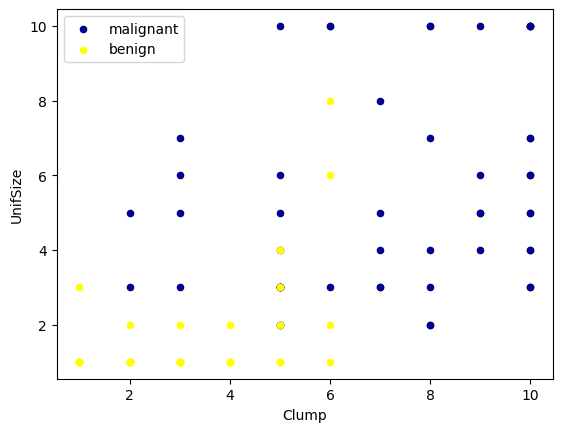

In [5]:

ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()





Mapping data into a higher dimensional space is called kernelling. Kernel functions:
- Linear
- Polynomial
- Sigmoid
- Radial basis function (RBF)

Adventages: - memory efficient: uses a subset of training points in the decision function (subset: support vectors) - accurate in high dimensional space

Disadventages: - Prone to over-fitting (if the number of features is much greater than the number of samples) - small dataset (<1000 rows) - no probability estimation - longer training time duration

- Image recognition
- Text category assigment
- Bioinformatic data (Gene expression classifition etc.)
- Spam detection
- Medical dataset



#### Data pre-processing and selection

In [6]:
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
192,1212232,5,1,1,1,2,1,2,1,1,2
10,1035283,1,1,1,1,1,1,3,1,1,2
27,1066979,5,1,1,1,2,1,2,1,1,2
614,1031608,2,1,1,1,1,1,2,1,1,2
386,1080233,7,6,6,3,2,10,7,1,1,4


In [7]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [9]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [10]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]], dtype=int64)

In [11]:

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y[0:10]


array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

#### Train/test split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


#### Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [13]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat[0:10]

array([4, 4, 4, 4, 4, 4, 2, 2, 4, 4])

#### Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, yhat)

print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           2       0.99      0.97      0.98        89
           4       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



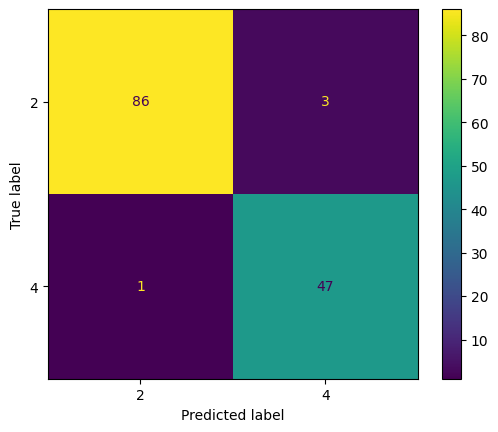

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[2,4])
disp.plot()

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9709349565971047

In [18]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=2)

0.9555555555555556

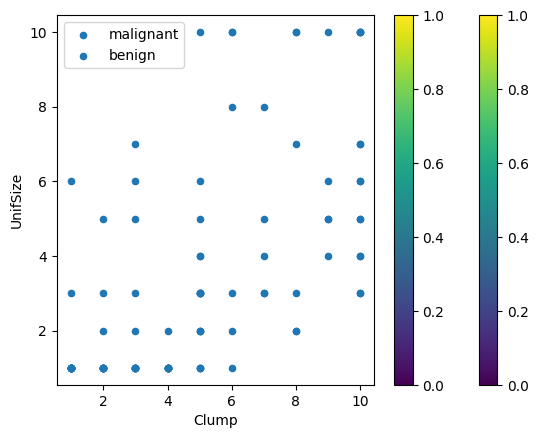

In [14]:
ax = cell_df[cell_df['Class']==4][:50].plot(kind='scatter',
                                            x='Clump',
                                            y='UnifSize',
                                            colorbar='DarkBlue',
                                            label='malignant'
                                            )
cell_df[cell_df['Class']==2][:50].plot(kind='scatter',
                                            x='Clump',
                                            y='UnifSize',
                                            colorbar='yellow',
                                            label='benign',
                                            ax=ax  # İlk plot ile aynı eksen üzerine ekleniyor
                                            )
plt.show()

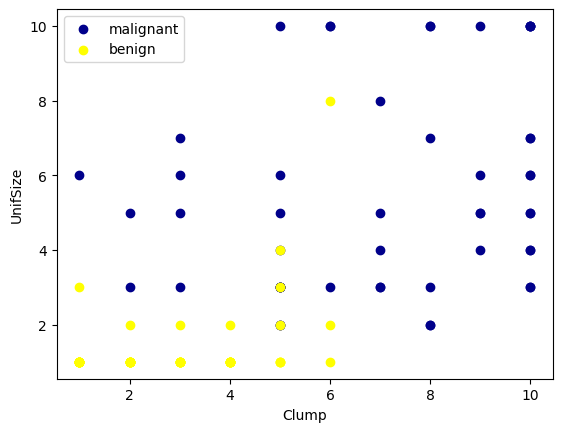

In [19]:
# Malignant ve benign verileri aynı grafik üzerinde göster
plt.scatter(
    x=cell_df[cell_df['Class'] == 4]['Clump'][:50],
    y=cell_df[cell_df['Class'] == 4]['UnifSize'][:50],
    color='DarkBlue',
    label='malignant'
)

plt.scatter(
    x=cell_df[cell_df['Class'] == 2]['Clump'][:50],
    y=cell_df[cell_df['Class'] == 2]['UnifSize'][:50],
    color='yellow',
    label='benign'
)

plt.xlabel('Clump')
plt.ylabel('UnifSize')
plt.legend()
plt.show()